In [2]:
import numpy as np
import pandas as pd
import data_clean_utils
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('swiggy.csv')

In [4]:
data_clean_utils.perform_data_cleaning(df)

In [5]:
df=pd.read_csv("swiggy_cleaned.csv")

In [6]:
df.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,BANG,25,3,friday,0,5.0,19.0,evening,20.183530,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138,medium


In [7]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [8]:
# columns not relevant for model training
columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day",
                    "city_name",
                    "order_day_of_week",
                    "order_month"]
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,1,15.0,afternoon,6.210138,medium


In [9]:
df.isna().sum()

,0
age,1854
ratings,1908
weather,525
traffic,510
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1198


WE WILL TRY TWO ALTERNATIVES - DROPPING MISSING VALUES AND IMPUTING THEM.

We shall implement whichever gives us better results. To compare we will train a basic model and check

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
# columns that have missing values
missing_cols = df.isna().any(axis=0).loc[lambda x: x].index
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

DROP MISSING VALUES

In [12]:
temp_df = df.copy().dropna()

In [13]:
X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

In [14]:
X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45496,35.0,4.2,windy,jam,2,drinks,motorcycle,1.0,no,metropolitian,0,10.0,night,16.600272,very_long
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,0,10.0,morning,1.489846,short
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,0,15.0,night,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,0,5.0,afternoon,6.232393,medium


In [15]:
y

,time_taken
0,24
1,33
2,26
3,21
4,30
...,...
45496,33
45497,32
45499,16
45500,26


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (30156, 15)
The shape of test data is (7539, 15)


In [18]:
# double checking missing data in training data
X_train.isna().sum()

,0
age,0
ratings,0
weather,0
traffic,0
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,0
festival,0
city_type,0


In [19]:
X_train.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'is_weekend', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [20]:
len(X_train.columns)

15

In [21]:
# basic preprocessing
num_cols = ["age","ratings","pickup_time_minutes","distance"]
nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]
ordinal_cat_cols = ["traffic","distance_type"]

In [22]:
len(num_cols + nominal_cat_cols + ordinal_cat_cols)

13

In [23]:
for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['jam' 'medium' 'high' 'low']
distance_type ['medium' 'short' 'long' 'very_long']


In [24]:
# order for ordinal encoding
traffic_order = ["low","medium","high","jam"]
distance_type_order = ["short","medium","long","very_long"]

In [25]:
preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order]), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

preprocessor.set_output(transform="pandas")

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [26]:
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)
X_train_trans

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,city_type_semi-urban,city_type_urban,is_weekend_1,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,vehicle_condition,multiple_deliveries
8708,0.473684,0.56,1.0,0.404165,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0,2.0
25198,1.000000,0.76,0.0,0.154044,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1.0
34049,0.473684,0.80,0.5,0.002461,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1,0.0
25987,1.000000,0.92,1.0,0.460411,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0,1.0
37121,0.526316,0.76,0.5,0.243676,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20239,0.578947,0.92,0.5,0.451895,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,0,0.0
7590,0.052632,1.00,1.0,0.612270,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1,1.0
13610,0.526316,0.92,0.0,0.322877,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0.0
1045,0.947368,0.96,0.5,0.004486,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0


In [27]:
# transforming target column
pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [28]:
pt.lambdas_

array([0.32446096])

In [29]:
y_train_pt

array([[ 2.02867161],
       [ 0.55453913],
       [-2.02426721],
       ...,
       [-1.35093653],
       [ 0.04711066],
       [ 0.2571302 ]])

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_trans, y_train_pt.ravel())

RandomForestRegressor()

In [31]:
y_pred_train = rf.predict(X_train_trans)
y_pred_test = rf.predict(X_test_trans)

In [32]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [33]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 1.16 minutes
The test error is 3.09 minutes


In [34]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.98
The test r2 score is 0.83


In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf,X_train_trans,y_train_pt.ravel(),cv=5,scoring="r2",n_jobs=-1)
scores

array([0.80934354, 0.81042242, 0.81106498, 0.8091837 , 0.81274567])

In [36]:
print(f"The mean cross val score is {scores.mean()}")

The mean cross val score is 0.8105520599035947


<Axes: >

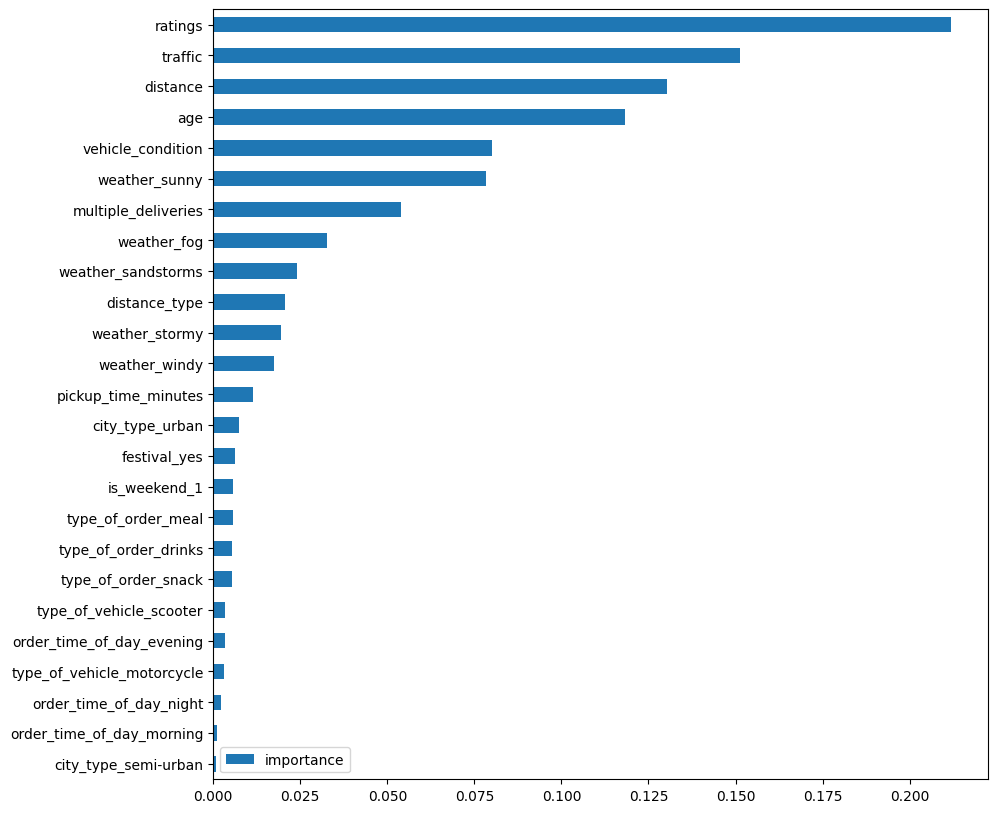

In [37]:
pd.DataFrame(rf.feature_importances_, index=X_train_trans.columns, columns=["importance"]).sort_values(by="importance").plot(kind='barh',figsize=(10,10))

#IMPUTING MISSING VALUES

In [38]:
temp_df = df.copy()

In [39]:
X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (36401, 15)
The shape of test data is (9101, 15)


In [42]:
X_train.isna().sum()

,0
age,1470
ratings,1510
weather,421
traffic,407
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,795
festival,188
city_type,968


In [43]:
pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [44]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [45]:
# percentage of rows in data having missing values
X_train.isna().any(axis=1).mean().round(2) * 100

np.float64(17.0)

17% of rows have missing values

IMPUTATION PIPELINE

In [46]:
from sklearn import set_config
set_config(transform_output="pandas")

In [47]:
num_cols = ["age","ratings","pickup_time_minutes","distance"]
nominal_cat_cols = ['weather',
                    'type_of_order',
                    'type_of_vehicle',
                    "festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]
ordinal_cat_cols = ["traffic","distance_type"]

In [48]:
X_train.isna().sum()

,0
age,1470
ratings,1510
weather,421
traffic,407
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,795
festival,188
city_type,968


In [49]:
# features to fill values with mode
features_to_fill_mode = ['multiple_deliveries','festival','city_type']
features_to_fill_missing = [col for col in nominal_cat_cols if col not in features_to_fill_mode]
features_to_fill_missing

['weather',
 'type_of_order',
 'type_of_vehicle',
 'is_weekend',
 'order_time_of_day']

In [50]:
# simple imputer to fill categorical vars with mode
simple_imputer = ColumnTransformer(transformers=[
    ("mode_imputer",SimpleImputer(strategy="most_frequent",add_indicator=True),features_to_fill_mode),
    ("missing_imputer",SimpleImputer(strategy="constant",fill_value="missing",add_indicator=True),features_to_fill_missing)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

simple_imputer

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('mode_imputer',
                                 SimpleImputer(add_indicator=True,
                                               strategy='most_frequent'),
                                 ['multiple_deliveries', 'festival',
                                  'city_type']),
                                ('missing_imputer',
                                 SimpleImputer(add_indicator=True,
                                               fill_value='missing',
                                               strategy='constant'),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'is_weekend', 'order_time_of_day'])],
                  verbose_feature_names_out=False)

In [51]:
simple_imputer.fit_transform(X_train)

,multiple_deliveries,festival,city_type,missingindicator_multiple_deliveries,missingindicator_festival,missingindicator_city_type,weather,type_of_order,type_of_vehicle,is_weekend,order_time_of_day,missingindicator_weather,missingindicator_order_time_of_day,age,ratings,traffic,vehicle_condition,pickup_time_minutes,distance,distance_type
11029,1.0,no,metropolitian,False,False,False,windy,snack,electric_scooter,0,evening,False,False,26.0,4.7,jam,2,10.0,9.177684,medium
15665,1.0,no,metropolitian,False,False,False,windy,drinks,motorcycle,0,afternoon,False,False,21.0,4.9,medium,2,5.0,6.081536,medium
14475,1.0,no,metropolitian,False,False,False,stormy,meal,scooter,1,missing,False,True,NaN,NaN,low,2,NaN,1.554563,short
29199,1.0,no,metropolitian,False,False,False,windy,buffet,motorcycle,0,evening,False,False,32.0,4.7,medium,0,15.0,20.852271,very_long
22514,0.0,no,urban,False,False,False,sandstorms,meal,scooter,0,night,False,False,34.0,4.9,jam,1,5.0,9.056096,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,no,metropolitian,False,False,False,sandstorms,meal,scooter,0,evening,False,False,29.0,4.7,jam,2,5.0,12.464367,long
44732,0.0,no,urban,False,False,False,cloudy,buffet,motorcycle,0,morning,False,False,36.0,4.8,low,0,10.0,1.520432,short
38158,0.0,no,metropolitian,False,False,False,fog,buffet,scooter,0,evening,False,False,36.0,4.4,jam,1,10.0,NaN,NaN
860,1.0,no,metropolitian,False,False,False,windy,meal,scooter,1,afternoon,False,False,25.0,4.9,medium,2,5.0,7.760938,medium


In [52]:
simple_imputer.fit_transform(X_train).isna().sum()

,0
multiple_deliveries,0
festival,0
city_type,0
missingindicator_multiple_deliveries,0
missingindicator_festival,0
missingindicator_city_type,0
weather,0
type_of_order,0
type_of_vehicle,0
is_weekend,0


In [53]:
# knn imputer
knn_imputer = KNNImputer(n_neighbors=5)

In [54]:
# order for ordinal encoding
traffic_order = ["low","medium","high","jam"]
distance_type_order = ["short","medium","long","very_long"]

In [55]:
for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['jam' 'medium' 'low' 'high' nan]
distance_type ['medium' 'short' 'very_long' 'long' nan]


In [56]:
# preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [57]:
# # converting the trasnformed np array back to a df
# from sklearn.preprocessing import FunctionTransformer
# def to_df(X):
#     return pd.DataFrame(X, columns=simple_imputer.get_feature_names_out())

# df_converter = FunctionTransformer(to_df, feature_names_out="one-to-one")

In [58]:
# pipeline
processing_pipeline = Pipeline(steps=[
                                ("simple_imputer",simple_imputer),
                                ("preprocess",preprocessor),
                                ("knn_imputer",knn_imputer)
                            ])
processing_pipeline

Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('mode_imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='most_frequent'),
                                                  ['multiple_deliveries',
                                                   'festival', 'city_type']),
                                                 ('missing_imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                fill_value='missing',
                                                                strategy='constant'),
                                                  ['...
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False)),
                ('knn_imputer', KNNImputer())])

In [59]:
processing_pipeline.fit_transform(X_train)

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_missing,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,...,order_time_of_day_night,traffic,distance_type,multiple_deliveries,missingindicator_multiple_deliveries,missingindicator_festival,missingindicator_city_type,missingindicator_weather,missingindicator_order_time_of_day,vehicle_condition
11029,0.315789,0.880,0.5,0.395429,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
15665,0.052632,0.960,0.0,0.236688,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
14475,0.557895,0.896,0.7,0.004588,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
29199,0.631579,0.880,1.0,0.993990,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22514,0.736842,0.960,0.0,0.389195,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.473684,0.880,0.0,0.563939,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
44732,0.842105,0.920,0.5,0.002839,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.842105,0.760,0.5,0.156967,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
860,0.263158,0.960,0.0,0.322792,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0


In [60]:
rf = RandomForestRegressor()
model_pipe = Pipeline(steps=[("preprocessing",processing_pipeline), ("model",rf)])

model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 fill_value=...
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor())])

In [61]:
model_pipe.fit(X_train,y_train_pt.ravel())

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 fill_value=...
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor())])

In [62]:
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

In [63]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [64]:
print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 1.22 minutes
The test error is 3.29 minutes


In [65]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.97
The test r2 score is 0.80


In [66]:
scores = cross_val_score(model_pipe,X_train,y_train_pt.ravel(),cv=5,scoring="r2",n_jobs=-1)
scores

array([0.78075166, 0.78740334, 0.78358631, 0.78073923, 0.78609219])

In [67]:
print(f"The mean cross val score is {scores.mean()}")

The mean cross val score is 0.7837145437838405


# For imputing missing data:

The train error is 1.21 minutes and test error is 3.29 minutes

The train r2 score is 0.97 and the test r2 score is 0.80

The mean cross val score is 0.7838498375669652


# For removing NaNs

The train error is 1.16 minutes and test error is 3.09 minutes

The train r2 score is 0.98 and the test r2 score is 0.83

The mean cross val score is 0.8091295226929824

Now, even though both show major overfitting, removing the missing values is performing slightly better so we will move forward with that

# Trying out different models and comparing their performances

In [68]:
temp_df=df.copy().dropna()

In [69]:
X=temp_df.drop(columns='time_taken')
y=temp_df['time_taken']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
X_train.isna().sum()

,0
age,0
ratings,0
weather,0
traffic,0
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,0
festival,0
city_type,0


In [72]:
pt = PowerTransformer()
y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

We have already built the preprocessing steps above so I am calling them directly

In [73]:
processing_pipeline = Pipeline(steps=[("preprocess",preprocessor)])

processing_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  ['age', 'ratings',
                                                   'pickup_time_minutes',
                                                   'distance']),
                                                 ('nominal_encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False))])

In [74]:
X_train_trans = processing_pipeline.fit_transform(X_train)
X_test_trans = processing_pipeline.transform(X_test)

In [75]:
X_train_trans

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,city_type_semi-urban,city_type_urban,is_weekend_1,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,vehicle_condition,multiple_deliveries
8708,0.473684,0.56,1.0,0.404165,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0,2.0
25198,1.000000,0.76,0.0,0.154044,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1.0
34049,0.473684,0.80,0.5,0.002461,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1,0.0
25987,1.000000,0.92,1.0,0.460411,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0,1.0
37121,0.526316,0.76,0.5,0.243676,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20239,0.578947,0.92,0.5,0.451895,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,0,0.0
7590,0.052632,1.00,1.0,0.612270,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1,1.0
13610,0.526316,0.92,0.0,0.322877,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0.0
1045,0.947368,0.96,0.5,0.004486,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0


Building the model evaluation code using optuna

In [76]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 21.6 MB/s eta 0:00:00


In [77]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna

In [78]:
model_results = {}
def objective(trial):
    model_name = trial.suggest_categorical("model", ["SVM", "RF", "KNN", "GB", "XGB", "LGBM"])

    if model_name == "SVM":
        kernel = trial.suggest_categorical("kernel_svm", ["linear", "poly", "rbf"])
        if kernel == "linear":
            c = trial.suggest_float("c_linear", 0.01, 10)
            model = SVR(C=c, kernel="linear")
        elif kernel == "poly":
            c = trial.suggest_float("c_poly", 0.01, 10)
            degree = trial.suggest_int("degree_poly", 2, 5)
            model = SVR(C=c, degree=degree, kernel="poly")
        else:
            c = trial.suggest_float("c_rbf", 0.01, 100)
            gamma = trial.suggest_float("gamma_rbf", 0.01, 10)
            model = SVR(C=c, gamma=gamma, kernel="rbf")

    elif model_name == "RF":
        n = trial.suggest_int("n_estimators_rf", 10, 200)
        d = trial.suggest_int("max_depth_rf", 2, 20)
        model = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=42, n_jobs=-1)

    elif model_name == "GB":
        n = trial.suggest_int("n_estimators_gb", 10, 200)
        lr = trial.suggest_float("learning_rate_gb", 0.01, 1)
        d = trial.suggest_int("max_depth_gb", 2, 20)
        model = GradientBoostingRegressor(n_estimators=n, learning_rate=lr, max_depth=d, random_state=42)

    elif model_name == "KNN":
        k = trial.suggest_int("n_neighbors_knn", 1, 25)
        weights = trial.suggest_categorical("weights_knn", ["uniform", "distance"])
        model = KNeighborsRegressor(n_neighbors=k, weights=weights, n_jobs=-1)

    elif model_name == "XGB":
        n = trial.suggest_int("n_estimators_xgb", 10, 200)
        lr = trial.suggest_float("learning_rate_xgb", 0.1, 0.5)
        d = trial.suggest_int("max_depth_xgb", 2, 20)
        model = XGBRegressor(n_estimators=n, learning_rate=lr, max_depth=d, random_state=42, n_jobs=-1)

    elif model_name == "LGBM":
        n = trial.suggest_int("n_estimators_lgbm", 10, 200)
        lr = trial.suggest_float("learning_rate_lgbm", 0.1, 0.5)
        d = trial.suggest_int("max_depth_lgbm", 2, 20)
        model = LGBMRegressor(n_estimators=n, learning_rate=lr, max_depth=d, random_state=42)

    # Fit the model
    model.fit(X_train_trans, y_train_pt.values.ravel())

    # Predict and inverse-transform
    y_pred_test = model.predict(X_test_trans)
    y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1, 1))
    error = mean_absolute_error(y_test, y_pred_test_org)
    r2 = r2_score(y_test, y_pred_test_org)

    # Store best result if not already or if better
    current_best = model_results.get(model_name)
    if current_best is None or error < current_best["mae"]:
        model_results[model_name] = {
            "model": model,
            "params": trial.params,
            "mae": error,
            "r2": r2
        }

    return error

In [79]:
study = optuna.create_study(direction="minimize", study_name="model_selection")
study.optimize(objective, n_trials=30, n_jobs=-1)

[I 2025-07-01 13:37:38,746] A new study created in memory with name: model_selection
[I 2025-07-01 13:37:39,122] Trial 1 finished with value: 3.0755662610637735 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 48, 'learning_rate_lgbm': 0.44471892031241234, 'max_depth_lgbm': 14}. Best is trial 1 with value: 3.0755662610637735.
[I 2025-07-01 13:37:40,592] Trial 2 finished with value: 3.1314735412597656 and parameters: {'model': 'XGB', 'n_estimators_xgb': 123, 'learning_rate_xgb': 0.40825320095915574, 'max_depth_xgb': 6}. Best is trial 1 with value: 3.0755662610637735.
[I 2025-07-01 13:37:40,796] Trial 3 finished with value: 3.1055469760565924 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 18, 'learning_rate_lgbm': 0.36799995973997335, 'max_depth_lgbm': 12}. Best is trial 1 with value: 3.0755662610637735.
[I 2025-07-01 13:37:47,358] Trial 4 finished with value: 3.325223684310913 and parameters: {'model': 'XGB', 'n_estimators_xgb': 173, 'learning_rate_xgb': 0.4288173415672679

In [80]:
import joblib
joblib.dump(study, "optuna_study.pkl")

['optuna_study.pkl']

In [81]:
study.best_value

3.035721234589174

In [82]:
study.best_params

{'model': 'LGBM',
 'n_estimators_lgbm': 95,
 'learning_rate_lgbm': 0.21909802051538715,
 'max_depth_lgbm': 15}

In [85]:
study.best_trial

FrozenTrial(number=21, state=1, values=[3.035721234589174], datetime_start=datetime.datetime(2025, 7, 1, 13, 48, 44, 952559), datetime_complete=datetime.datetime(2025, 7, 1, 13, 48, 45, 441335), params={'model': 'LGBM', 'n_estimators_lgbm': 95, 'learning_rate_lgbm': 0.21909802051538715, 'max_depth_lgbm': 15}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'model': CategoricalDistribution(choices=('SVM', 'RF', 'KNN', 'GB', 'XGB', 'LGBM')), 'n_estimators_lgbm': IntDistribution(high=200, log=False, low=10, step=1), 'learning_rate_lgbm': FloatDistribution(high=0.5, log=False, low=0.1, step=None), 'max_depth_lgbm': IntDistribution(high=20, log=False, low=2, step=1)}, trial_id=21, value=None)

In [86]:
lgbm_params = {
    "n_estimators": 95,
    "learning_rate": 0.21909802051538715,
    "max_depth": 15
}

In [87]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_c_linear,params_c_poly,params_c_rbf,params_degree_poly,params_gamma_rbf,...,params_max_depth_rf,params_max_depth_xgb,params_model,params_n_estimators_gb,params_n_estimators_lgbm,params_n_estimators_rf,params_n_estimators_xgb,params_n_neighbors_knn,params_weights_knn,state
0,0,4.087377,2025-07-01 13:37:38.748835,2025-07-01 13:38:21.901598,0 days 00:00:43.152763,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GB,199.0,NaN,NaN,NaN,NaN,NaN,COMPLETE
1,1,3.075566,2025-07-01 13:37:38.752871,2025-07-01 13:37:39.121975,0 days 00:00:00.369104,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,LGBM,NaN,48.0,NaN,NaN,NaN,NaN,COMPLETE
2,2,3.131474,2025-07-01 13:37:39.125274,2025-07-01 13:37:40.592637,0 days 00:00:01.467363,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,XGB,NaN,NaN,NaN,123.0,NaN,NaN,COMPLETE
3,3,3.105547,2025-07-01 13:37:40.602251,2025-07-01 13:37:40.796886,0 days 00:00:00.194635,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,LGBM,NaN,18.0,NaN,NaN,NaN,NaN,COMPLETE
4,4,3.325224,2025-07-01 13:37:40.800953,2025-07-01 13:37:47.358510,0 days 00:00:06.557557,NaN,NaN,NaN,NaN,NaN,...,NaN,14.0,XGB,NaN,NaN,NaN,173.0,NaN,NaN,COMPLETE
5,5,3.079810,2025-07-01 13:37:47.371872,2025-07-01 13:37:47.882131,0 days 00:00:00.510259,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,LGBM,NaN,38.0,NaN,NaN,NaN,NaN,COMPLETE
6,6,6.567576,2025-07-01 13:37:47.885973,2025-07-01 13:48:40.196030,0 days 00:10:52.310057,NaN,NaN,53.718964,NaN,8.237032,...,NaN,NaN,SVM,NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE
7,7,3.352664,2025-07-01 13:38:21.910105,2025-07-01 13:38:27.694568,0 days 00:00:05.784463,NaN,NaN,NaN,NaN,NaN,...,NaN,14.0,XGB,NaN,NaN,NaN,58.0,NaN,NaN,COMPLETE
8,8,3.274647,2025-07-01 13:38:27.709330,2025-07-01 13:38:47.692509,0 days 00:00:19.983179,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GB,58.0,NaN,NaN,NaN,NaN,NaN,COMPLETE
9,9,3.418495,2025-07-01 13:38:47.694903,2025-07-01 13:39:01.345870,0 days 00:00:13.650967,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,RF,NaN,NaN,173.0,NaN,NaN,NaN,COMPLETE


In [88]:
study.trials_dataframe()['params_model'].value_counts()

,count
params_model,
LGBM,14
XGB,4
SVM,4
GB,3
RF,3
KNN,2


In [89]:
study.trials_dataframe().groupby("params_model")['value'].mean().sort_values()

,value
params_model,
LGBM,3.102259
XGB,3.236658
GB,3.768604
RF,4.152430
KNN,4.400064
SVM,4.913206


Lets check performance using lgbm and the parameters optuna found

In [90]:
lgbm = LGBMRegressor(**lgbm_params)
lgbm.fit(X_train_trans,y_train_pt.values.ravel())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 30156, number of used features: 25
[LightGBM] [Info] Start training from score -0.000000


LGBMRegressor(learning_rate=0.21909802051538715, max_depth=15, n_estimators=95)

In [91]:
y_pred_train = lgbm.predict(X_train_trans)
y_pred_test = lgbm.predict(X_test_trans)

In [92]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [93]:
print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 2.84 minutes
The test error is 3.04 minutes


In [94]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.86
The test r2 score is 0.83


In [96]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=lgbm, transformer=pt)

In [97]:
scores = cross_val_score(model,
                         X_train_trans,
                         y_train,
                         scoring="neg_mean_absolute_error",
                         cv=5,n_jobs=-1)
scores

array([-3.10318494, -3.05304833, -3.08601608, -3.06943737, -3.06171845])

In [99]:
print(f"The mean cross val score is {- scores.mean()}")

The mean cross val score is 3.0746810357362113


Clearly, lgbm has reduced overfitting and improved r2 score drastically on test data

In [100]:
# Find best RF trial
rf_trials = [t for t in study.trials if t.params.get("model") == "RF" and t.value is not None]
best_rf_trial = min(rf_trials, key=lambda t: t.value)

# Extract best params
best_rf_params = {
    'n_estimators': best_rf_trial.params['n_estimators_rf'],
    'max_depth': best_rf_trial.params['max_depth_rf'],
    'random_state': 42,
    'n_jobs': -1
}

# Print for confirmation
print("Best RF Trial MAE:", best_rf_trial.value)
print("Best RF Params:", best_rf_params)


Best RF Trial MAE: 3.1748597756424473
Best RF Params: {'n_estimators': 10, 'max_depth': 20, 'random_state': 42, 'n_jobs': -1}


# We will now build a STACKED REGRESSOR

Diverse models perform well together so we will use LGBM and RF, as they are boosting and bagging respectively (instead of lgbm-xgb, or lgbm-gb)- we will conduct further HP for both lgbm and rf and get the best parameters

#LGBM Hyperparameter tuning

In [101]:
def objective_lgbm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 4, 30),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 5, 20),
        "min_split_gain": trial.suggest_float("min_split_gain", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 100),
        "random_state": 42,
        "n_jobs": -1,
    }

    model = TransformedTargetRegressor(
        regressor=LGBMRegressor(**params),
        transformer=pt
    )

    # 5-fold CV with MAE
    score = -cross_val_score(
        model, X_train_trans, y_train,
        scoring="neg_mean_absolute_error",
        cv=5, n_jobs=-1
    ).mean()

    return score


In [102]:
study_lgbm = optuna.create_study(direction="minimize", study_name="LGBM_Tuning")
study_lgbm.optimize(objective_lgbm, n_trials=50, show_progress_bar=True)

[I 2025-07-01 14:18:01,030] A new study created in memory with name: LGBM_Tuning


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-07-01 14:18:14,016] Trial 0 finished with value: 3.4677573563662065 and parameters: {'n_estimators': 152, 'max_depth': 12, 'learning_rate': 0.342485189868805, 'subsample': 0.8687739126612927, 'min_child_weight': 5, 'min_split_gain': 1.7687531567203674, 'reg_lambda': 18.383946425576937}. Best is trial 0 with value: 3.4677573563662065.
[I 2025-07-01 14:18:17,584] Trial 1 finished with value: 3.456646360998988 and parameters: {'n_estimators': 155, 'max_depth': 24, 'learning_rate': 0.3992640816106556, 'subsample': 0.8727531289702559, 'min_child_weight': 7, 'min_split_gain': 1.337990301991658, 'reg_lambda': 65.6676214268011}. Best is trial 1 with value: 3.456646360998988.
[I 2025-07-01 14:18:22,316] Trial 2 finished with value: 3.591012458590865 and parameters: {'n_estimators': 275, 'max_depth': 15, 'learning_rate': 0.2712594782505861, 'subsample': 0.9381081742299469, 'min_child_weight': 9, 'min_split_gain': 2.7980436852296853, 'reg_lambda': 96.56841993277257}. Best is trial 1 with 

In [106]:
def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 4, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", [None, "sqrt", "log2"]),
        "random_state": 42,
        "n_jobs": -1,
    }

    model = TransformedTargetRegressor(
        regressor=RandomForestRegressor(**params),
        transformer=pt
    )

    score = -cross_val_score(
        model, X_train_trans, y_train,
        scoring="neg_mean_absolute_error",
        cv=5, n_jobs=-1
    ).mean()

    return score

In [107]:
study_rf = optuna.create_study(direction="minimize", study_name="RF_Tuning")
study_rf.optimize(objective_rf, n_trials=50, show_progress_bar=True)

[I 2025-07-01 14:31:43,329] A new study created in memory with name: RF_Tuning


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-07-01 14:32:06,273] Trial 0 finished with value: 3.276593143845928 and parameters: {'n_estimators': 283, 'max_depth': 27, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 3.276593143845928.
[I 2025-07-01 14:32:26,222] Trial 1 finished with value: 3.253936694059509 and parameters: {'n_estimators': 237, 'max_depth': 28, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 1 with value: 3.253936694059509.
[I 2025-07-01 14:33:01,391] Trial 2 finished with value: 3.1743135398722018 and parameters: {'n_estimators': 148, 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 2 with value: 3.1743135398722018.
[I 2025-07-01 14:33:13,759] Trial 3 finished with value: 3.6335017971350254 and parameters: {'n_estimators': 219, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 2 with value: 3.1743135398722018.

In [108]:
best_lgbm = LGBMRegressor(**study_lgbm.best_params)
best_rf = RandomForestRegressor(**study_rf.best_params)

In [109]:
joblib.dump(best_rf, "best_rf.pkl")
joblib.dump(best_lgbm, "best_lgbm.pkl")
joblib.dump(pt, "power_transformer.pkl")
joblib.dump(processing_pipeline, "preprocessing_pipeline.pkl")
np.save("X_train_trans.npy", X_train_trans)
np.save("y_train_pt.npy", y_train_pt)

In [110]:
best_lgbm

LGBMRegressor(learning_rate=0.24720917429791045, max_depth=9,
              min_child_weight=20, min_split_gain=0.009630085539364529,
              n_estimators=235, reg_lambda=75.84474317378098,
              subsample=0.5804585054664448)

In [111]:
best_rf

RandomForestRegressor(max_depth=21, max_features=None, min_samples_leaf=2,
                      min_samples_split=19, n_estimators=286)

In [112]:
best_lgbm_m = LGBMRegressor(
    n_estimators=235,
    learning_rate=0.24720917429791045,
    max_depth=9,
    subsample=0.5804585054664448,
    min_child_weight=20,
    min_split_gain=0.009630085539364529,
    reg_lambda=75.84474317378098,
    random_state=42,
    n_jobs=-1
)

best_rf_m = RandomForestRegressor(
    n_estimators=286,
    max_depth=21,
    max_features=None,
    min_samples_split=19,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor

In [114]:
def objective(trial):
    meta_model_name = trial.suggest_categorical("meta_model", ["LR", "KNN", "DT"])

    if meta_model_name == "LR":
        meta = LinearRegression()

    elif meta_model_name == "KNN":
        n_neighbors = trial.suggest_int("n_neighbors", 1, 15)
        weights = trial.suggest_categorical("weights", ["uniform", "distance"])
        meta = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, n_jobs=-1)

    elif meta_model_name == "DT":
        max_depth = trial.suggest_int("max_depth", 1, 10)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
        meta = DecisionTreeRegressor(max_depth=max_depth,
                                     min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,
                                     random_state=42)

    stacking_reg = StackingRegressor(
        estimators=[("rf", best_rf_m), ("lgbm", best_lgbm_m)],
        final_estimator=meta,
        cv=5,
        n_jobs=-1
    )

    model = TransformedTargetRegressor(regressor=stacking_reg, transformer=pt)
    model.fit(X_train_trans, y_train)

    preds = model.predict(X_test_trans)
    error = mean_absolute_error(y_test, preds)
    return error

In [115]:
study = optuna.create_study(direction="minimize", study_name="stacking_meta_model")
study.optimize(objective, n_trials=20, n_jobs=-1, show_progress_bar=True)

[I 2025-07-01 15:19:36,713] A new study created in memory with name: stacking_meta_model


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-07-01 15:23:29,105] Trial 1 finished with value: 3.0166741345461263 and parameters: {'meta_model': 'LR'}. Best is trial 1 with value: 3.0166741345461263.
[I 2025-07-01 15:23:32,912] Trial 0 finished with value: 3.0166741345461263 and parameters: {'meta_model': 'LR'}. Best is trial 1 with value: 3.0166741345461263.


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[I 2025-07-01 15:27:13,645] Trial 2 finished with value: 3.0689262497687646 and parameters: {'meta_model': 'DT', 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 1 with value: 3.0166741345461263.
[I 2025-07-01 15:27:24,933] Trial 3 finished with value: 3.0415922282086583 and parameters: {'meta_model': 'DT', 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 1 with value: 3.0166741345461263.
[I 2025-07-01 15:30:58,462] Trial 4 finished with value: 3.089881859695484 and parameters: {'meta_model': 'KNN', 'n_neighbors': 14, 'weights': 'uniform'}. Best is trial 1 with value: 3.0166741345461263.
[I 2025-07-01 15:31:08,557] Trial 5 finished with value: 3.082106283232977 and parameters: {'meta_model': 'KNN', 'n_neighbors': 15, 'weights': 'uniform'}. Best is trial 1 with value: 3.0166741345461263.
[I 2025-07-01 15:34:42,048] Trial 6 finished with value: 3.2213664942114506 and parameters: {'meta_model': 'KNN', 'n_neighbors': 7, 'weights': 

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[I 2025-07-01 15:34:51,551] Trial 7 finished with value: 3.077735020727385 and parameters: {'meta_model': 'DT', 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 1 with value: 3.0166741345461263.
[I 2025-07-01 15:38:30,389] Trial 8 finished with value: 3.0166741345461263 and parameters: {'meta_model': 'LR'}. Best is trial 1 with value: 3.0166741345461263.
[I 2025-07-01 15:38:34,771] Trial 9 finished with value: 3.5603383503212807 and parameters: {'meta_model': 'DT', 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 1 with value: 3.0166741345461263.
[I 2025-07-01 15:42:14,017] Trial 10 finished with value: 3.1078290587606783 and parameters: {'meta_model': 'KNN', 'n_neighbors': 12, 'weights': 'uniform'}. Best is trial 1 with value: 3.0166741345461263.
[I 2025-07-01 15:42:19,049] Trial 11 finished with value: 3.016674134546126 and parameters: {'meta_model': 'LR'}. Best is trial 11 with value: 3.016674134546126.
[I 2025-07-01 15:45:5

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[I 2025-07-01 15:57:24,933] Trial 19 finished with value: 3.0166741345461263 and parameters: {'meta_model': 'LR'}. Best is trial 11 with value: 3.016674134546126.


In [116]:
print("Best MAE:", study.best_value)
print("Best meta-model & params:")
print(study.best_params)

Best MAE: 3.016674134546126
Best meta-model & params:
{'meta_model': 'LR'}


In [118]:
lr=LinearRegression()

In [119]:
stacking_reg = StackingRegressor(estimators=[("rf",best_rf_m),
                                            ("lgbm",best_lgbm_m)],
                                final_estimator=lr,
                                cv=5,n_jobs=-1)
model = TransformedTargetRegressor(regressor=stacking_reg, transformer=pt)
model.fit(X_train_trans,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PowerTransformer was fitted without feature names
  warnings.warn(


TransformedTargetRegressor(regressor=StackingRegressor(cv=5,
                                                       estimators=[('rf',
                                                                    RandomForestRegressor(max_depth=21,
                                                                                          max_features=None,
                                                                                          min_samples_leaf=2,
                                                                                          min_samples_split=19,
                                                                                          n_estimators=286,
                                                                                          n_jobs=-1,
                                                                                          random_state=42)),
                                                                   ('lgbm',
                                                                    LGBMRegressor(learning_rate=0.24720917429791045,
                                                                                  max_depth=9,
                                                                                  min_child_weight=20,
                                                                                  min_split_gain=0.009630085539364529,
                                                                                  n_estimators=235,
                                                                                  n_jobs=-1,
                                                                                  random_state=42,
                                                                                  reg_lambda=75.84474317378098,
                                                                                  subsample=0.5804585054664448))],
                                                       final_estimator=LinearRegression(),
                                                       n_jobs=-1),
                           transformer=PowerTransformer())

In [120]:
y_train_pred = model.predict(X_train_trans)
y_test_pred = model.predict(X_test_trans)
train_mae = mean_absolute_error(y_train,y_train_pred)
test_mae = mean_absolute_error(y_test,y_test_pred)
train_r2 = r2_score(y_train,y_train_pred)
test_r2 = r2_score(y_test,y_test_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [121]:
print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Train MAE: 2.5331
Test MAE: 3.0167
Train R²: 0.8868
Test R²: 0.8374


In [124]:
import pickle
with open("final_stacked_model.pkl", "wb") as f:
    pickle.dump(model, f)
print("✅ Final stacked model saved as 'final_stacked_model.pkl'")

✅ Final stacked model saved as 'final_stacked_model.pkl'


In [125]:
cv_scores = cross_val_score(model,
                            X_train_trans,
                            y_train,cv=3,
                            scoring="neg_mean_absolute_error",
                            n_jobs=-1)

In [126]:
-cv_scores

array([3.07235837, 3.07667012, 3.0537911 ])